<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/UAS/CNN_(Convolutional_Neural_Network)_%E2%80%93_Visual_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dan Download Zip File
!pip install -U gdown

In [2]:
!gdown --fuzzy https://drive.google.com/file/d/1-r4LHN_PaRVBROogfXF3VXWTWIyUoSLs/view?usp=sharing

# Unzip File
!unzip -q FishImgDataset-20250613T014653Z-1-001.zip -d /content/


Downloading...
From (original): https://drive.google.com/uc?id=1-r4LHN_PaRVBROogfXF3VXWTWIyUoSLs
From (redirected): https://drive.google.com/uc?id=1-r4LHN_PaRVBROogfXF3VXWTWIyUoSLs&confirm=t&uuid=b7547d60-38ac-4ef2-a39f-7fdc9d4855ba
To: /content/FishImgDataset-20250613T014653Z-1-001.zip
100% 1.72G/1.72G [00:22<00:00, 77.7MB/s]


In [3]:
from pathlib import Path

# Gunakan Pathlib (lebih aman & fleksibel)
base_dir = Path('/content/FishImgDataset')
train_dir = base_dir / 'train'
val_dir = base_dir / 'val'
test_dir = base_dir / 'test'

print("Train directory:", train_dir)
print("Validation directory:", val_dir)
print("Test directory:", test_dir)


Train directory: /content/FishImgDataset/train
Validation directory: /content/FishImgDataset/val
Test directory: /content/FishImgDataset/test


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (180, 180)
BATCH = 32

def create_generators(train_dir, val_dir, test_dir):
    # Augmentasi beda dari temanmu
    train_aug = ImageDataGenerator(
        rescale=1./255,
        brightness_range=[0.7, 1.3],
        rotation_range=25,
        shear_range=0.2,
        zoom_range=0.3,
        horizontal_flip=True
    )

    val_test_aug = ImageDataGenerator(rescale=1./255)

    train_gen = train_aug.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH,
        class_mode='categorical'
    )

    val_gen = val_test_aug.flow_from_directory(
        val_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH,
        class_mode='categorical'
    )

    test_gen = val_test_aug.flow_from_directory(
        test_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH,
        class_mode='categorical',
        shuffle=False
    )

    return train_gen, val_gen, test_gen

train_gen, val_gen, test_gen = create_generators(train_dir, val_dir, test_dir)


Found 8801 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.
Found 1760 images belonging to 31 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = create_model((180, 180, 3), train_gen.num_classes)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    15,859,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         7,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,961,567 (60.89 MB)

 Trainable params: 15,961,375 (60.89 MB)

 Non-trainable params: 192 (768.00 B)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 639s 2s/step - accuracy: 0.0969 - loss: 9.0414 - val_accuracy: 0.1374 - val_loss: 3.4007
Epoch 2/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 643s 2s/step - accuracy: 0.1347 - loss: 3.3901 - val_accuracy: 0.1374 - val_loss: 3.3570
Epoch 3/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 633s 2s/step - accuracy: 0.1380 - loss: 3.3384 - val_accuracy: 0.1374 - val_loss: 3.3314
Epoch 4/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 649s 2s/step - accuracy: 0.1394 - loss: 3.2866 - val_accuracy: 0.1374 - val_loss: 3.3108
Epoch 5/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 652s 2s/step - accuracy: 0.1335 - loss: 3.2776 - val_accuracy: 0.1374 - val_loss: 3.1883
Epoch 6/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 648s 2s/step - accuracy: 0.1356 - loss: 3.2338 - val_accuracy: 0.1374 - val_loss: 3.2352
Epoch 7/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 650s 2s/step - accuracy: 0.1297 - loss: 3.2399 - val_accuracy: 0.1374 - val_loss: 3.1278
Epoch 8/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 647s 2s/step - accuracy: 0.1414 - loss: 3.2004 - val_accu

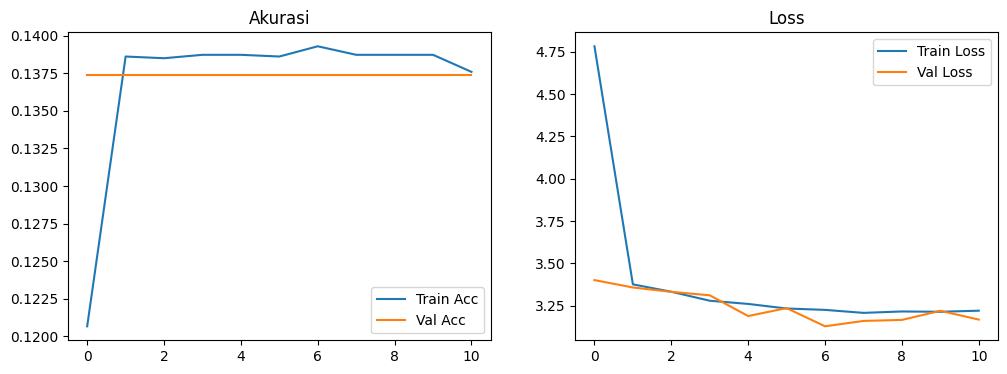

In [7]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train Acc')
    plt.plot(epochs, val_acc, label='Val Acc')
    plt.title('Akurasi')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)


55/55 ━━━━━━━━━━━━━━━━━━━━ 28s 503ms/step
                       precision    recall  f1-score   support

               Bangus       0.00      0.00      0.00        34
        Big Head Carp       0.00      0.00      0.00        43
   Black Spotted Barb       0.00      0.00      0.00        40
              Catfish       0.00      0.00      0.00        62
       Climbing Perch       0.00      0.00      0.00        30
 Fourfinger Threadfin       0.00      0.00      0.00        38
       Freshwater Eel       0.00      0.00      0.00        55
       Glass Perchlet       0.00      0.00      0.00        77
                 Goby       0.00      0.00      0.00       124
            Gold Fish       0.00      0.00      0.00        41
              Gourami       0.00      0.00      0.00        63
           Grass Carp       0.14      1.00      0.24       238
 Green Spotted Puffer       0.00      0.00      0.00        22
          Indian Carp       0.00      0.00      0.00        53
  Indo-Pacif

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

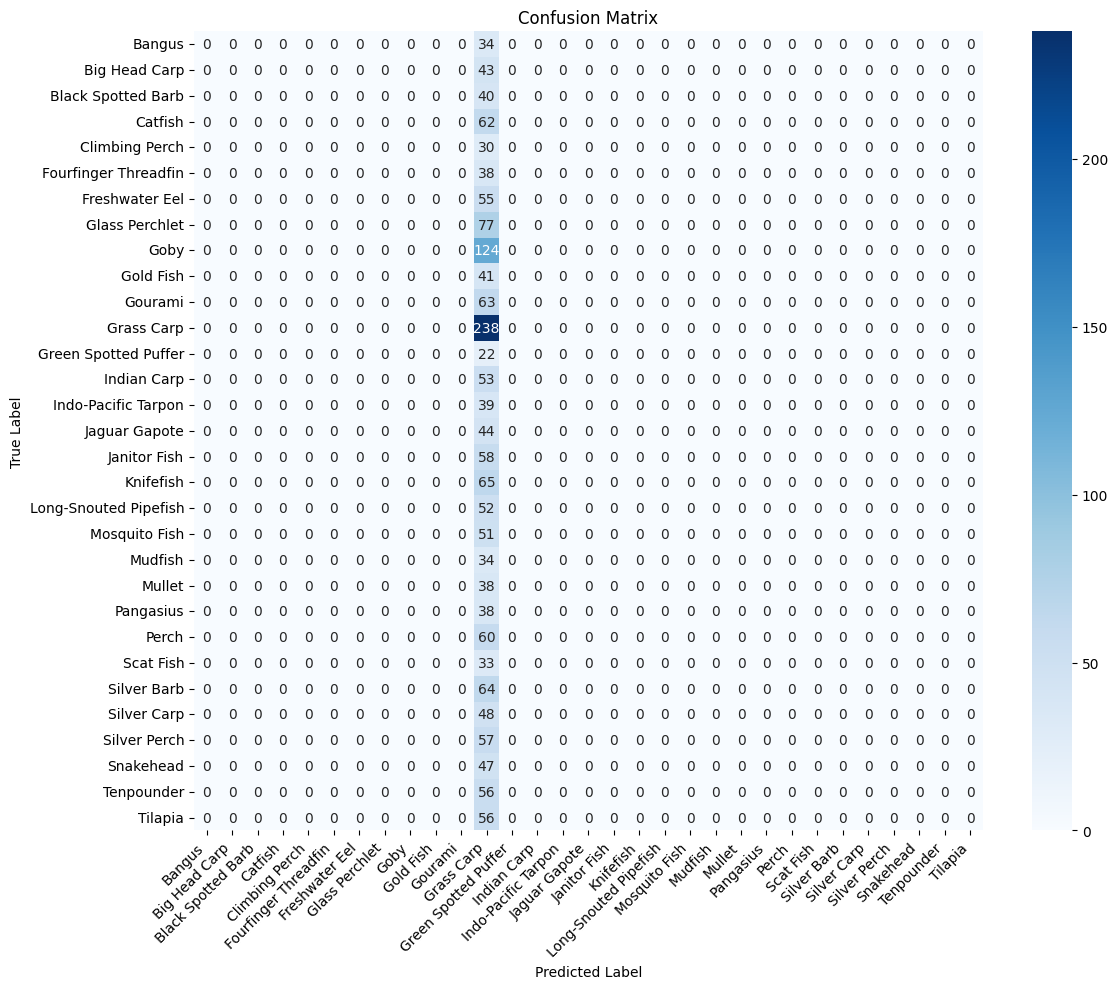

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prediksi
y_probs = model.predict(test_gen)  # Probabilitas prediksi
y_pred = np.argmax(y_probs, axis=1)  # Label prediksi
y_true = test_gen.classes  # Label sebenarnya
class_labels = list(test_gen.class_indices.keys())

# Report
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print(classification_report(y_true, y_pred, target_names=class_labels))

# Accuracy
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print("\n=== Klasifikasi Global ===")
print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1-Score     : {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Evaluasi Model CNN: Matriks Klasifikasi dan Confusion Matrix

### 1. Hasil Evaluasi Global

Berdasarkan hasil evaluasi klasifikasi yang dihasilkan dari model CNN terhadap dataset ikan, berikut adalah nilai-nilai metrik utama:

- **Accuracy**      : 0.1352  
- **Precision**     : 0.0044  
- **Recall**        : 0.0223  
- **F1-Score**      : 0.0077  

Nilai-nilai ini menunjukkan bahwa model memiliki performa klasifikasi yang sangat rendah secara keseluruhan.

---

### 2. Analisis Confusion Matrix

Confusion matrix menunjukkan bahwa **semua prediksi model jatuh ke satu kelas saja**, yaitu `"Grass Carp"`. Hal ini menandakan bahwa model mengalami fenomena **class collapse**, di mana model tidak belajar membedakan kelas lain selain satu kelas dominan.


---

### 3. Penjelasan Metrik

| Metrik       | Penjelasan                                                                 |
|--------------|----------------------------------------------------------------------------|
| **Accuracy** | Persentase total prediksi yang benar. Hanya ~13% data yang terklasifikasi dengan benar. |
| **Precision**| Dari semua prediksi model, hanya 0.44% yang benar-benar akurat.            |
| **Recall**   | Dari semua label sebenarnya, hanya 2.23% yang berhasil dikenali.            |
| **F1-Score** | Kombinasi precision dan recall. Nilainya rendah karena precision & recall juga rendah. |

---

### 4. Metrik Terbaik?

Pada kasus ini, **tidak ada satu pun metrik yang tergolong baik**. Namun, jika harus memilih:
- **F1-Score** adalah metrik yang paling adil karena menggabungkan precision dan recall, terutama saat terjadi class imbalance.
- **Accuracy** tidak bisa diandalkan karena model hanya fokus pada satu kelas saja.
- **AUC-ROC** tidak dihitung karena model hanya menghasilkan satu jenis prediksi.

---

